Pregunta 1: Calcule n!; la correspondiente **aproximacion de Stirling** $(S(n))=n!\approx \sqrt{2\pi n} n^n e^{-n}$; la diferencia entre ellas $(D(n)=n!-S(n))$; y la diferencia relativa $(DR(n)=D(n)/n!)$ para $n=1,...,12.$

In [1]:
# Define the function to compute factorial, Stirling's approximation, and differences
compute_stirling <- function(n) {
  factorial_n <- factorial(n)  # Compute n!
  stirling_approx <- sqrt(2 * pi * n) * (n^n) * exp(-n)  # Compute Stirling's approximation
  difference <- factorial_n - stirling_approx  # Absolute difference
  relative_difference <- difference / factorial_n  # Relative difference
  
  return(data.frame(n, factorial_n, stirling_approx, difference, relative_difference))
}

# Apply the function for n = 1 to 12
results <- do.call(rbind, lapply(1:12, compute_stirling))

# Print the results
print(results)


    n factorial_n stirling_approx   difference relative_difference
1   1           1    9.221370e-01 7.786299e-02         0.077862991
2   2           2    1.919004e+00 8.099565e-02         0.040497824
3   3           6    5.836210e+00 1.637904e-01         0.027298401
4   4          24    2.350618e+01 4.938249e-01         0.020576036
5   5         120    1.180192e+02 1.980832e+00         0.016506934
6   6         720    7.100782e+02 9.921815e+00         0.013780299
7   7        5040    4.980396e+03 5.960417e+01         0.011826224
8   8       40320    3.990240e+04 4.176045e+02         0.010357256
9   9      362880    3.595369e+05 3.343127e+03         0.009212762
10 10     3628800    3.598696e+06 3.010438e+04         0.008295960
11 11    39916800    3.961563e+07 3.011749e+05         0.007545067
12 12   479001600    4.756875e+08 3.314114e+06         0.006918794


| n  | n!  | S(n)  | D(n)  | D(n)/n!  |
|---|---|---|---|---|
| 1  |   |   |   |   |
| 2  |   |   |   |   |
| 3  |   |   |   |   |
| 4  |   |   |   |   |
| 5  |   |   |   |   |
| 6  |   |   |   |   |
| 7  |   |   |   |   |
| 8  |   |   |   |   |
| 9  |   |   |   |   |
| 10  |   |   |   |   |
| 11  |   |   |   |   |
| 12  |   |   |   |   |

Pregunta 2 (Simulacion): Ejecute el codigo anterior. Note que el objeto out es de clase “histogram”. Investigue que componentes tiene la lista out.

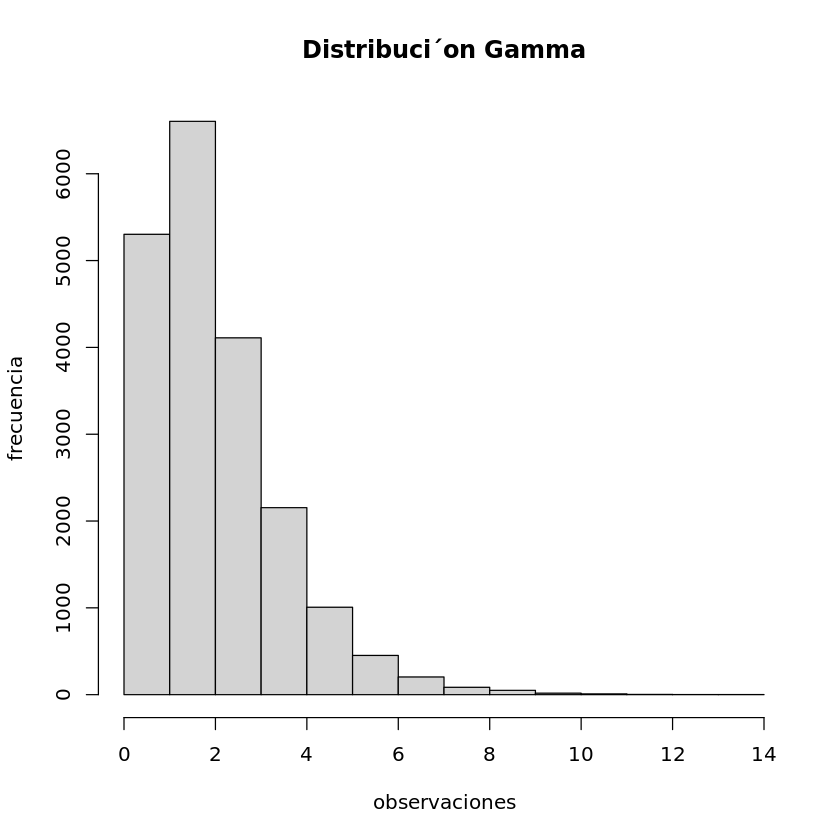

In [3]:
set.seed(20240905)
N <- 20000
x <- rgamma(N, shape=2, scale=1)
out <- hist(x, xlab="observaciones", ylab="frecuencia", main="Distribuci´on Gamma")

In [6]:
str(out)

List of 6
 $ breaks  : num [1:15] 0 1 2 3 4 5 6 7 8 9 ...
 $ counts  : int [1:14] 5303 6604 4110 2154 1007 452 204 85 50 17 ...
 $ density : num [1:14] 0.2651 0.3302 0.2055 0.1077 0.0503 ...
 $ mids    : num [1:14] 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 ...
 $ xname   : chr "x"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


Con base en la simulacion anterior determine $p_N=P_N(3< X \leq 4)$ y comparelo con $p=P(3<X\leq4)$, la probabilidad teorica calculada con base en la distribucion de X, $Gamma(\alpha=2, \beta=1)$. La diferencia entre ellas es el **error de estimacion**, $\epsilon=p_N-p=0.1079-0.1076=-0.0003$

In [ ]:
# Compute empirical probability p_N
p_N <- mean(x > 3 & x <= 4)

# Compute theoretical probability p using pgamma function
theoretical_p <- pgamma(4, shape=2, scale=1) - pgamma(3, shape=2, scale=1)

# Compute estimation error epsilon
epsilon <- p_N - theoretical_p

# Print results
cat("Empirical Probability (p_N):", p_N, "\n")
cat("Theoretical Probability (p):", theoretical_p, "\n")
cat("Estimation Error (epsilon):", epsilon, "\n")

Empirical Probability (p_N): 0.1077 
Theoretical Probability (p): 0.1075701 
Estimation Error (epsilon): 0.000129921 


Pregunta 3) Calcule los errores de aproximacion de la distribucion normal teórica $(\phi)$ a la distribucion del promedio de las distintas leyes de probabilidad de la tabla 2 para tamaños de muestra $n=30,100,500$, indicados en la tabla 3. 

---

Tabla 2: tabla de funciones de dnsidad para distitnas leyes de probabilidad: 
$$\begin{align*}
\text{Binomial: }& f(k;n,p)=\binom{n}{k}p^k(1-p)^{n-k}\mathbb{I}_{\{0,1,...,n\}}(k)\\
\text{Poisson: }& f(n;\lambda)=e^{-\lambda}\frac{\lambda^n}{n!}\mathbb{I}_{\{0,1,...,n\}}(n)\\
\text{Normal: }& f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{1}{2}(\frac{x-\mu}{\sigma})^2}\mathbb{I}_{\mathbb{R}}(x)\\
\text{Gamma: }& f(y;\alpha,\beta)=\frac{1}{\beta^\alpha\Gamma(\alpha)}y^{\alpha-1}e^{-y/\beta}\mathbb{I}_{\mathbb{R^+}}(y)\\
\text{Beta: }& f(u;\theta_1,\theta_2)=\frac{\Gamma(\theta_1)\Gamma(\theta_2)}{\Gamma(\theta_1+\theta_2)}u^{\theta_1-1}(1-u)^{\theta_2-1}\mathbb{I}_{(0,1)}(u)
\end{align*}$$

In [8]:
# Function to compute normal approximation errors
compute_normal_approx_error <- function(dist, samples, n_values, params) {
  errors <- data.frame()
  
  for (n in n_values) {
    sample_means <- replicate(1000, {
      if (dist == "binomial") {
        mean(rbinom(n, size=params$size, prob=params$prob))
      } else if (dist == "poisson") {
        mean(rpois(n, lambda=params$lambda))
      } else if (dist == "normal") {
        mean(rnorm(n, mean=params$mu, sd=sqrt(params$sigma2)))
      } else if (dist == "gamma") {
        mean(rgamma(n, shape=params$alpha, scale=params$beta))
      } else if (dist == "beta") {
        mean(rbeta(n, shape1=params$theta1, shape2=params$theta2))
      }
    })
    
    theoretical_sd <- sqrt(var(sample_means))
    normal_approx_sd <- sd(rnorm(1000, mean=mean(sample_means), sd=theoretical_sd))
    error <- abs(theoretical_sd - normal_approx_sd)
    
    errors <- rbind(errors, data.frame(distribution=dist, n=n, error=error))
  }
  
  return(errors)
}

# Define sample sizes
n_values <- c(30, 100, 500)

# Define parameters for different distributions
distributions <- list(
  binomial = list(size=10, prob=0.5),
  poisson = list(lambda=4),
  normal = list(mu=2, sigma2=4),
  gamma = list(alpha=3, beta=1),
  beta = list(theta1=1, theta2=1)
)

# Compute errors for each distribution
errors_list <- lapply(names(distributions), function(d) compute_normal_approx_error(d, 1000, n_values, distributions[[d]]))
errors_df <- do.call(rbind, errors_list)

# Print the errors
print(errors_df)

   distribution   n        error
1      binomial  30 0.0048076186
2      binomial 100 0.0017377124
3      binomial 500 0.0038437253
4       poisson  30 0.0048552849
5       poisson 100 0.0000855522
6       poisson 500 0.0004606245
7        normal  30 0.0084982439
8        normal 100 0.0022024482
9        normal 500 0.0038983928
10        gamma  30 0.0087983653
11        gamma 100 0.0049537035
12        gamma 500 0.0010603833
13         beta  30 0.0005558283
14         beta 100 0.0002853538
15         beta 500 0.0002525465


Tabla 3: error de aproximacion normal a la del promedio de muestras de tamaño n para distintas distribuciones.

| distribucion  | parametros  | n=30  | n=100  | n=500  | 
|---|---|---|---|---|
| Binomial  | p=0.5,p=0.7,p=0.9  |   |   |   |
| Poisson  | λ=1,λ=4,λ=8  |   |   |   |
| Normal  | µ=2, σ^2=4  |   |   |   |
| Gamma  | (α=1,β=3),(α=3,β=1),(α=5,β=5) |   |   |   |
| Beta  |  (θ_1=1,θ_2=1),(θ_1=1/2,θ_2=2),(θ_1=3,θ_2=1/3),(θ_1=1/2,θ_2=1/2) |   |   |   |